In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

df = pd.read_csv("Files\heart_dataset.csv")

# Convert famhist from 'Present'/'Absent' → 1/0
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        384 non-null    float64
 1   tobacco    372 non-null    float64
 2   ldl        373 non-null    float64
 3   adiposity  372 non-null    float64
 4   famhist    367 non-null    float64
 5   typea      371 non-null    float64
 6   obesity    372 non-null    float64
 7   alcohol    372 non-null    float64
 8   age        377 non-null    float64
 9   chd        373 non-null    float64
dtypes: float64(10)
memory usage: 32.3 KB


sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol   age  \
0  134.0    13.60  3.50      27.78      1.0   60.0    25.99    57.34  49.0   
1  132.0     6.20  6.47      36.21      1.0   62.0    30.77    14.14  45.0   
2  142.0     4.05  3.38      16.20      0.0    NaN    20.81     2.62  38.0   
3  114.0     4.08  4.59      14.60      1.0   62.0    23.11     6.72  58.0   
4  114.0      NaN  3.83      19.40      1.0   49.0    24.86     2.49   NaN   

   chd  
0  1.0  
1  0.0  
2  0.0  
3  NaN  
4  NaN

Text(0.5, 1.0, 'Missing Values Heatmap')

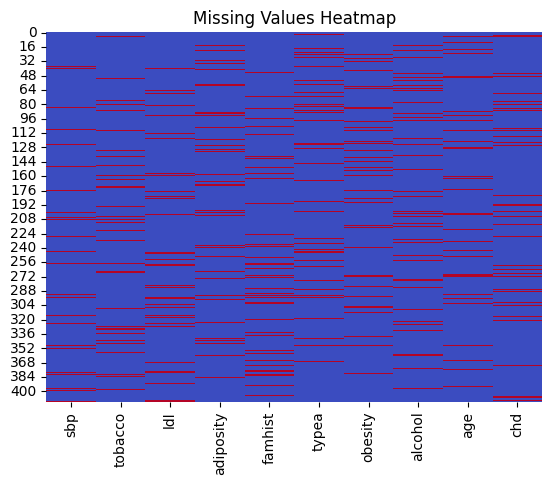

In [20]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")

In [21]:
df.describe()                     # (1)
df.loc[df['ldl'].idxmax()]        # (2)
df.loc[df['sbp'].idxmin()]        # (3)
df['tobacco'].agg(['mean','std']) # (4)


mean    3.676425
std     4.568564
Name: tobacco, dtype: float64

Text(0.5, 1.0, 'Alcohol Consumption — CHD = 1')

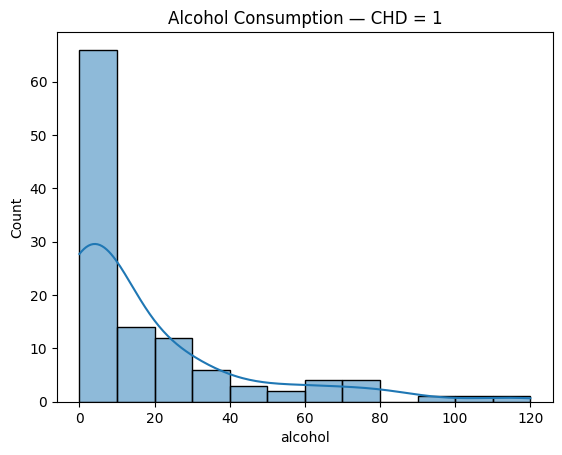

In [22]:
sns.histplot(df[df['chd']==1]['alcohol'], kde=True)
plt.title("Alcohol Consumption — CHD = 1")

C:\Users\balto\AppData\Local\Temp\ipykernel_25008\217659786.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = df.groupby('age_group')['chd'].mean()


<Axes: xlabel='age_group'>

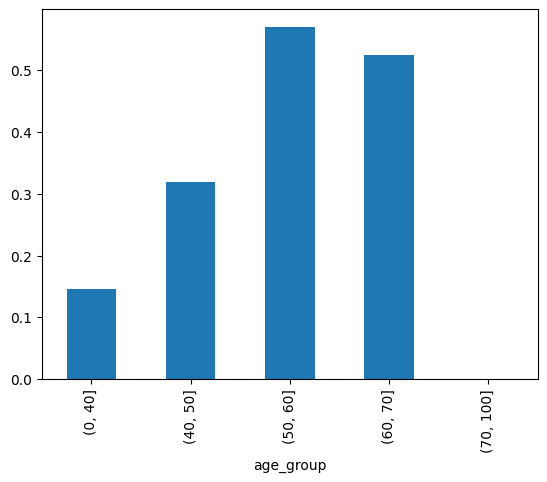

In [23]:
df['age_group'] = pd.cut(df['age'], bins=[0,40,50,60,70,100])
survival = df.groupby('age_group')['chd'].mean()
survival.plot(kind='bar')

Text(0.5, 1.0, 'Type-A Score vs CHD')

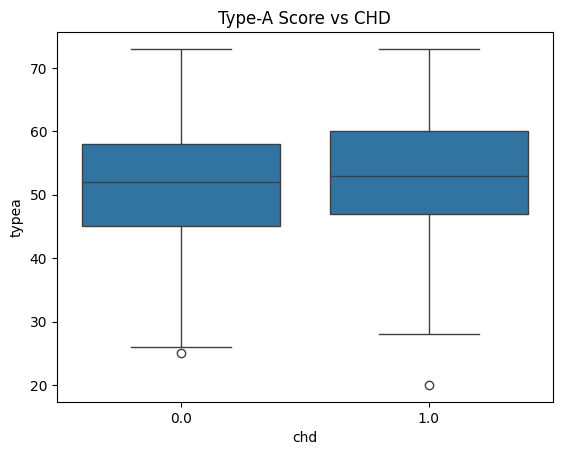

In [24]:
sns.boxplot(x='chd', y='typea', data=df)
plt.title("Type-A Score vs CHD")

<Axes: xlabel='chd', ylabel='sbp'>

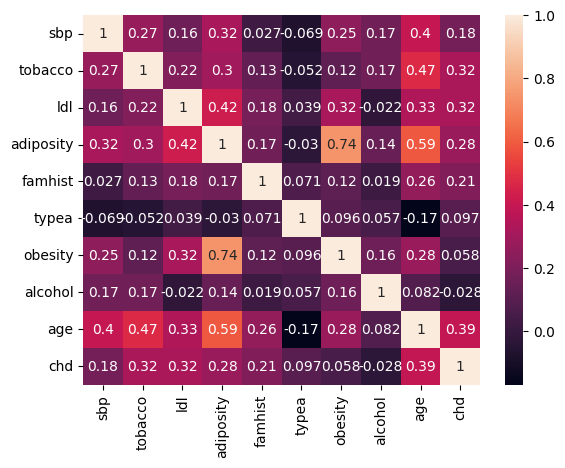

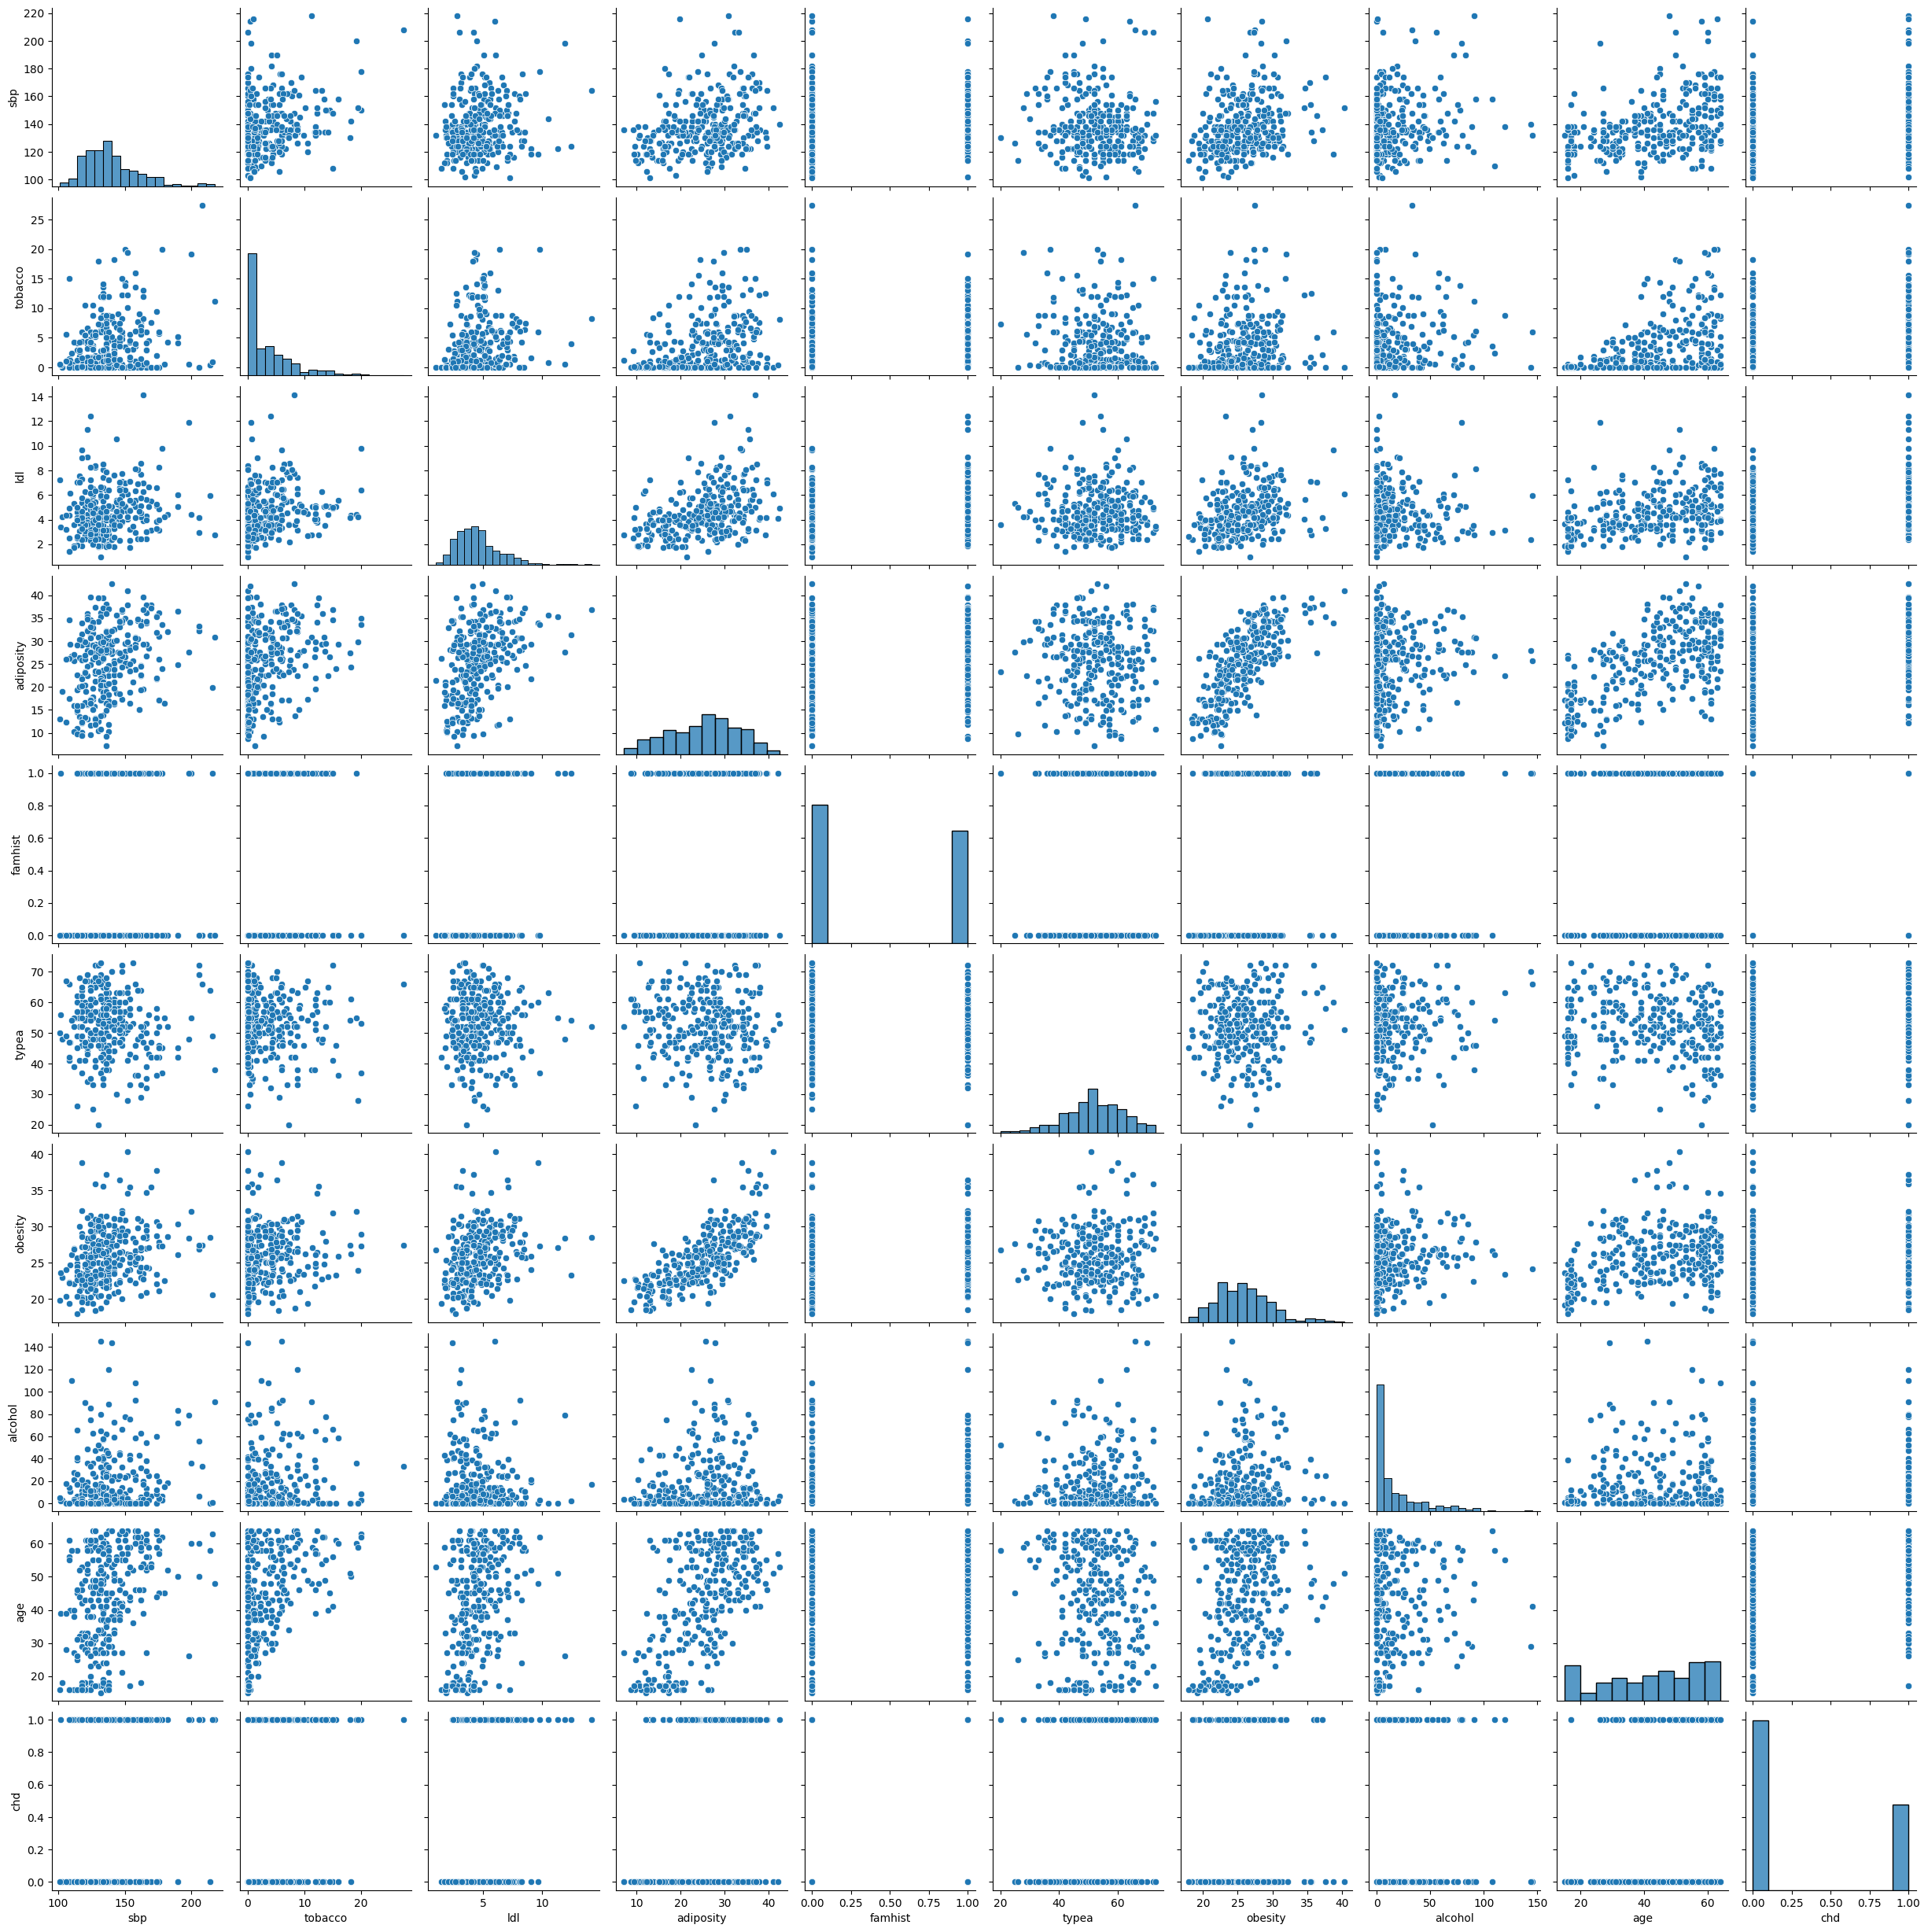

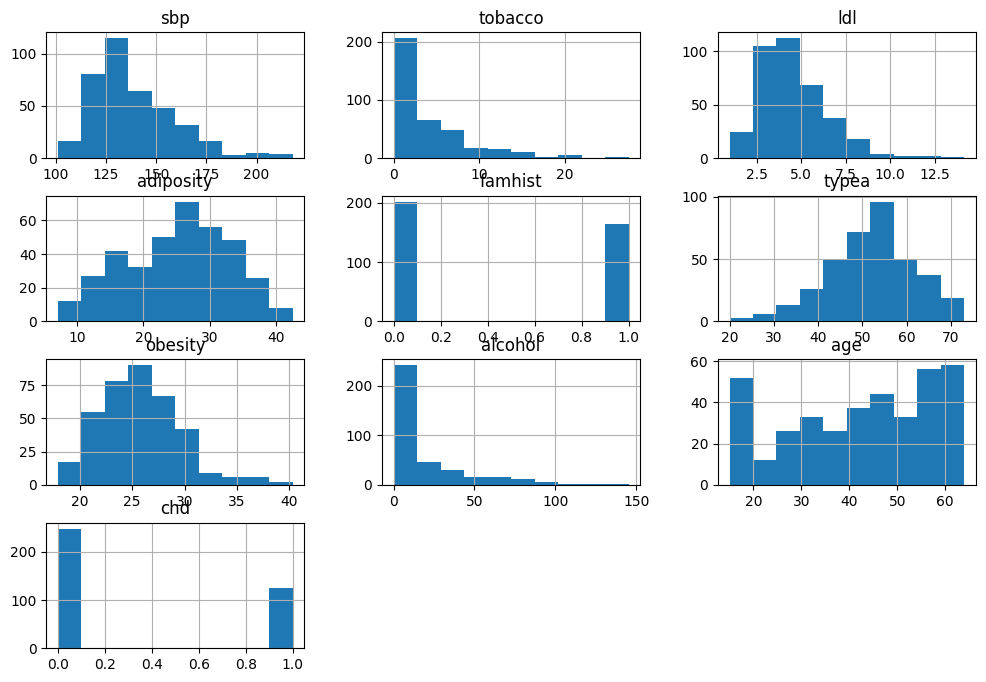

In [27]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True)
sns.pairplot(df)
df.hist(figsize=(12,8))
sns.boxplot(x='chd', y='sbp', data=df)

In [28]:
sample = df.sample(100, random_state=42)
p = (sample['chd']==1).mean()
# Probability of >40% = P(X>40) with Binomial(n=100,p0)
from scipy.stats import binom
binom.sf(40,100,df['chd'].mean())

0.07095922989498611

In [29]:
prob = len(df[(df['age']>60)&(df['famhist']==1)]) / len(df)

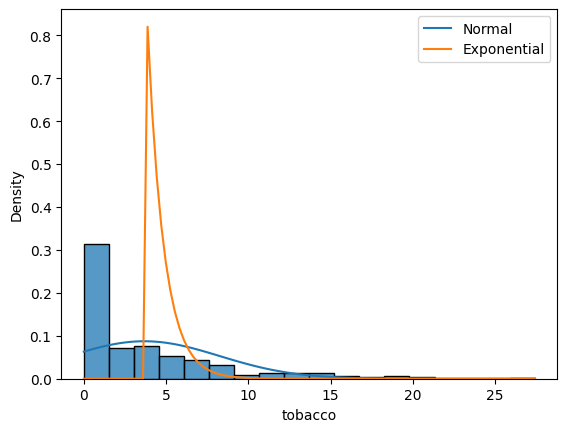

In [30]:
from scipy.stats import norm, expon
sns.histplot(df['tobacco'], kde=False, stat="density")
x = np.linspace(df['tobacco'].min(), df['tobacco'].max(), 100)
plt.plot(x, norm.pdf(x, df['tobacco'].mean(), df['tobacco'].std()), label="Normal")
plt.plot(x, expon.pdf(x, df['tobacco'].mean()), label="Exponential")
plt.legend()

In [31]:
from sklearn.datasets import load_iris
from scipy.stats import norm, binom, ttest_ind
import numpy as np

iris = load_iris(as_frame=True).frame

In [32]:
setosa = iris[iris['target']==0]['petal length (cm)']
mean, std = setosa.mean(), setosa.std()

def plot_std_normal_with_probability(mean, std, lower, upper):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y)
    plt.fill_between(x, y, where=(x>=lower)&(x<=upper), alpha=0.4)
    plt.title("Normal PDF with Shaded Probability")
    plt.show()

prob = norm.cdf(1.8,mean,std)-norm.cdf(1.2,mean,std)


<Axes: ylabel='Probability'>

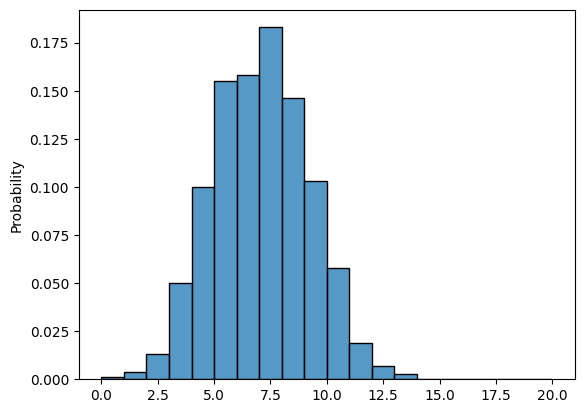

In [33]:
p = (iris['target']==0).mean()
prob_8 = binom.pmf(8, 20, p)
prob_10plus = binom.sf(9, 20, p)

sims = [np.sum(np.random.binomial(1,p,20)) for _ in range(1000)]
sns.histplot(sims, stat="probability", bins=range(0,21))


<Axes: xlabel='target', ylabel='sepal length (cm)'>

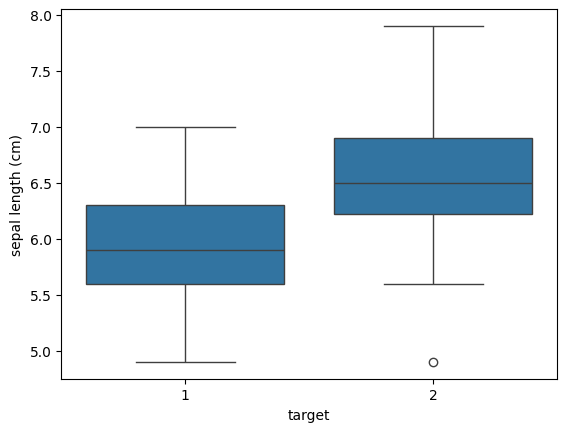

In [36]:
versicolor = iris[iris['target']==1]['sepal length (cm)']
virginica = iris[iris['target']==2]['sepal length (cm)']
t_stat, p_val = ttest_ind(versicolor, virginica, equal_var=False)

sns.boxplot(data=iris[iris['target']!=0], x='target', y='sepal length (cm)')


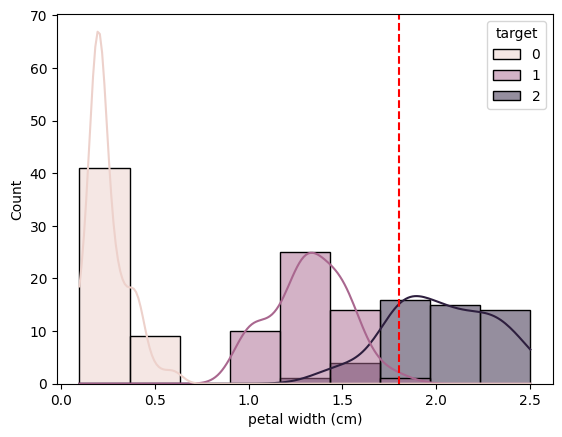

In [37]:
def bayes(prior, likelihood, evidence):
    return (prior * likelihood) / evidence

p_virginica = (iris['target']==2).mean()
p_width_given_virginica = np.mean((iris['target']==2) & (iris['petal width (cm)']>1.8)) / np.mean(iris['target']==2)
p_width = np.mean(iris['petal width (cm)']>1.8)

posterior = bayes(p_virginica, p_width_given_virginica, p_width)

sns.histplot(data=iris, x='petal width (cm)', hue='target', kde=True)
plt.axvline(1.8, color='red', linestyle='--')
